**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [2]:
from __future__ import print_function, division
import pylab as pl

import os
import json
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
# s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)
from matplotlib import style
style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, error=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if error is None:
        return a*x + b 
    else:
        return a*x + b + 10*(np.random.randn(len(x)) * errors(x))
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [4]:
x=np.array([10,20,30,40,50,60,70,80,90,100])
Y=line(3,x,error=True)

#### Reference: https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html

Text(0,0.5,'endogenous')

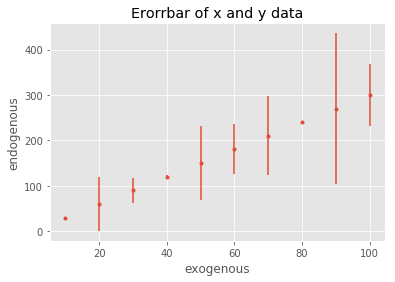

In [5]:
y=line(3,x)
pl.errorbar(x,y,yerr=10*(np.random.randn(len(x)) * errors(x)),fmt='.')
pl.title('Erorrbar of x and y data')
pl.xlabel('exogenous')
pl.ylabel('endogenous')

## Figure1:
### it shows the scatter plot of x and y with error abr

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [6]:
print(Y)
print(x)
X=sm.add_constant(x)
print(X)

[ 27.61851068 -46.21019568 192.03081424 154.32602458  77.23109975
 242.58096904 265.02940661 312.42797828 371.76152871 156.29868557]
[ 10  20  30  40  50  60  70  80  90 100]
[[  1.  10.]
 [  1.  20.]
 [  1.  30.]
 [  1.  40.]
 [  1.  50.]
 [  1.  60.]
 [  1.  70.]
 [  1.  80.]
 [  1.  90.]
 [  1. 100.]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [7]:
#THE WRONG WAY
smfit = smf.OLS(Y, x).fit()
smfit.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     49.87
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           5.91e-05
Time:                        12:46:33   Log-Likelihood:                -58.469
No. Observations:                  10   AIC:                             118.9
Df Residuals:                       9   BIC:                             119.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.1776      0.450      7.062      0.000       2.160       4.195
==============================================================================
Omnibus:                        1.696   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                1.184
Skew:                          -0.718   Prob(JB):                        0.553
Kurtosis:                       2.118   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#THE RIGHT WAY
smfit = smf.OLS(Y, X).fit()
smfit.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     9.286
Date:                Thu, 15 Nov 2018   Prob (F-statistic):             0.0159
Time:                        12:46:34   Log-Likelihood:                -58.468
No. Observations:                  10   AIC:                             120.9
Df Residuals:                       8   BIC:                             121.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5305     63.964      0.040      0.969    -144.971     150.032
x1             3.1414      1.031      3.047      0.016       0.764       5.519
==============================================================================
Omnibus:                        1.677   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.432   Jarque-Bera (JB):                1.175
Skew:                          -0.703   Prob(JB):                        0.556
Kurtosis:                       2.080   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

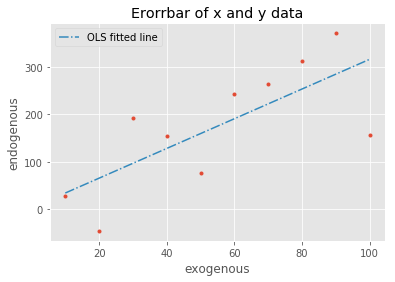

In [9]:
pl.plot(x,Y,'.')

pl.title('Erorrbar of x and y data')
pl.xlabel('exogenous')
pl.ylabel('endogenous')

beta0_sm, beta1_sm = smfit.params
pl.plot(x,x * beta1_sm + beta0_sm, '-.',
        label="OLS fitted line")
pl.xlabel('exogenous')
pl.ylabel('endogenous')
pl.legend()

## Figure2:
### it shows the scatter plot of x and y with OLS fitted line.

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [10]:
x=np.array([10,20,30,40,50,60,70,80,90,100])
Y=line(1.5,x,b=200,error=True)

Text(0,0.5,'endogenous')

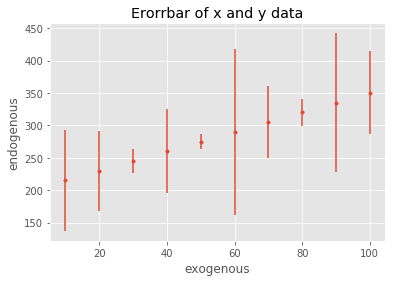

In [11]:
random.seed(10)
y=line(1.5,x,b=200)
pl.errorbar(x,y,yerr=10*(np.random.randn(len(x)) * errors(x)),fmt='.')
pl.title('Erorrbar of x and y data')
pl.xlabel('exogenous')
pl.ylabel('endogenous')

## Figure3:
### it shows the scatter plot of x and y with error bar.

# 6. repeat step 3

In [12]:
X=sm.add_constant(x)
smfit_ols = smf.OLS(Y, X).fit()
smfit_ols.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     9.497
Date:                Thu, 15 Nov 2018   Prob (F-statistic):             0.0151
Time:                        12:46:36   Log-Likelihood:                -53.954
No. Observations:                  10   AIC:                             111.9
Df Residuals:                       8   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        193.0247     40.731      4.739      0.001      99.098     286.951
x1             2.0229      0.656      3.082      0.015       0.509       3.537
==============================================================================
Omnibus:                        0.323   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.851   Jarque-Bera (JB):                0.442
Skew:                          -0.235   Prob(JB):                        0.802
Kurtosis:                       2.084   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

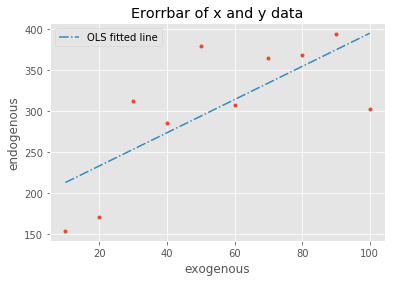

In [13]:
pl.plot(x,Y,'.')

pl.title('Erorrbar of x and y data')
pl.xlabel('exogenous')
pl.ylabel('endogenous')

beta0_sm, beta1_sm = smfit_ols.params
pl.plot(x,x * beta1_sm + beta0_sm, '-.',
        label="OLS fitted line")
pl.xlabel('exogenous')
pl.ylabel('endogenous')
pl.legend()

## Figure4:
### it shows the scatter plot of x and y with OLS fitted line and a larger intercept.

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [14]:
z=np.var(x)**2/x
X=sm.add_constant(x)
smfit_wls = smf.WLS(Y, X,weights=z).fit()
smfit_wls.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            WLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     20.71
Date:                Thu, 15 Nov 2018   Prob (F-statistic):            0.00187
Time:                        12:46:37   Log-Likelihood:                -54.259
No. Observations:                  10   AIC:                             112.5
Df Residuals:                       8   BIC:                             113.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.9835     27.407      5.327      0.001      82.783     209.184
x1             2.8782      0.632      4.551      0.002       1.420       4.337
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.347
Skew:                           0.325   Prob(JB):                        0.841
Kurtosis:                       2.359   Cond. No.                         70.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

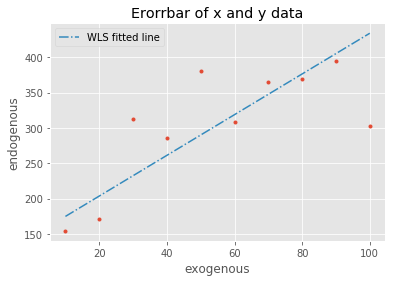

In [15]:
pl.plot(x,Y,'.')

pl.title('Erorrbar of x and y data')
pl.xlabel('exogenous')
pl.ylabel('endogenous')

beta0_sm, beta1_sm = smfit_wls.params
pl.plot(x,x * beta1_sm + beta0_sm, '-.',
        label="WLS fitted line")
pl.xlabel('exogenous')
pl.ylabel('endogenous')
pl.legend()

## Figure5:
### it shows the scatter plot of x and y with WLS fitted line and a larger intercept.

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

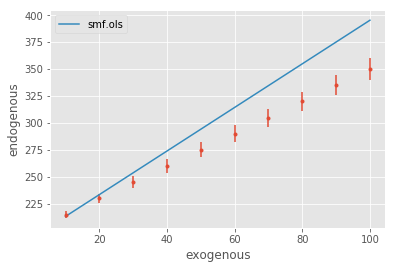

In [16]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':Y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
#pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();